In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import os 
from datetime import datetime
import time
import re
from konlpy.tag import Okt

In [7]:

service = Service(executable_path = ChromeDriverManager().install())
browser = webdriver.Chrome(service=service)

# implicit wait 
browser.implicitly_wait(5) # 로딩될 때까지 최대 5초 대기 
browser.maximize_window()

# 유튜브 영상 사이트로 이동
browser.get('https://www.youtube.com/watch?v=kW_z-NMuZIU') # 호주전
# browser.get("https://www.youtube.com/watch?v=FBynfiRGdlc") # 사우디전
time.sleep(5)

# 현재 페이지의 높이 조회 -> javascript***
scroll_pane_height = browser.execute_script("return document.documentElement.scrollHeight") 
# 댓글창 로딩될 만큼 스크롤 내리기
browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight * 0.1)")
time.sleep(2)

# 댓글 리스트 
comment_list=[]

# while True:
cnt = 0
while cnt <= 10:
    # 스크롤 내리기
    browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight)")
    # 이동 후 height 를 조회
    time.sleep(2)
    new_scroll_pane_height = browser.execute_script(
        "return document.documentElement.scrollHeight"
    )
    # 이전 높이와 이동 후 높이가 같다면 
    if scroll_pane_height == new_scroll_pane_height: 
        break
    scroll_pane_height = new_scroll_pane_height

    # 조회 (크롤링)
    time.sleep(1)
    comments_tag = browser.find_elements(By.CSS_SELECTOR,"#content-text > span") # css selector
    for tag in comments_tag:  
        comment_list.append(tag.text)
    
    cnt += 1

browser.close()



# 크롤링한 댓글 파일 저장 
# os.makedirs("project",exist_ok=True)
d = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

file_name = f'comments_{d}.txt'


In [8]:

with open(r'C:\class1\06_NLP_Preprocessing\pjt\comments_processed.txt', 'w',encoding='utf-8') as file:
    file.write(' '.join(comment_list))

comments = str(comment_list).replace("\n"," ")
print(len(comments))

109633


'댓글아시아 역사상 최고의 선수 손흥민 이번 아시안컵 최대 빌런은 대한민국임  상대팀 행복회로 다 돌려놓고 추가시간에 동점만들고 역전해버림  조현우 칭찬해줘라 진짜 손흥민 이번 프리킥은 그야말로 인간이 발로 만들수 있는 최고의 걸작 근데 황희찬 진짜 미친 강심장이다 저기서 본인이 나서서 실패하면 엄청 욕먹을거 알면서도 자신 있다고 하고 저렇게 깔끔하게 성공 '

In [87]:
f = open(r'C:\class1\06_NLP_Preprocessing\pjt\stopwords.csv',"rt", encoding = "utf-8")
stopwords = f.read().split("\n")
stopwords.extend(['게',"없다", "선수", "들다","아니다","해주다","내다", "스럽다","희다","진짜","끝","보다","보고","정말","경기","뛰다"])

In [9]:
from konlpy.tag import Okt, Mecab
import pandas as pd

# 객체 생성
okt = Okt()
# 불용어 처리
f = open(r'C:\class1\06_NLP_Preprocessing\pjt\stopwords.csv',"rt", encoding = "utf-8")
stopwords = f.read().split("\n")
stopwords.extend(['명','게',"없다", "선수", "들다","아니다","해주다","내다", "스럽다","희다","진짜","끝","보다","보고","정말","경기","뛰다"])


# 형태소 단위 토큰화
# okt_tokens = okt.morphs()
okt_tokens = okt.morphs(comments, stem=True) # stem=True: 원형복원 (Okt의 기능.)
comm_tokens = [word for word, pos in okt.pos(comments) if pos in ['Verb', 'Noun', 'Adjective']] # 동사 ,명사, 형용사 추출
filtered_tokens = [word for word in comm_tokens if word not in stopwords]  # 불용어 처리


print(type(filtered_tokens))
print('토큰수:', len(filtered_tokens))

<class 'list'>
토큰수: 21235


In [5]:
filtered_tokens[:50]

['아시아',
 '역사상',
 '최고',
 '손흥민',
 '황희찬',
 '미친',
 '강심장',
 '본인',
 '나서서',
 '실패하면',
 '욕먹을거',
 '알면서도',
 '있다고',
 '하고',
 '깔끔하게',
 '성공',
 '씨찬',
 '다시',
 '봤음',
 '더',
 '크게',
 '되길',
 '조현우',
 '칭찬',
 '해줘라',
 '조현우',
 '최고다',
 '사실',
 '막아주는',
 '매우',
 '중',
 '하다고',
 '생각',
 '함',
 '해줬다',
 '아시안컵',
 '최대',
 '빌런',
 '대한민국',
 '임',
 '상대',
 '팀',
 '행복',
 '회로',
 '돌려놓고',
 '추가',
 '동점',
 '만들고',
 '역전',
 '해']

In [10]:
from nltk import Text

txt = Text(filtered_tokens, name= '호주전')

fd = txt.vocab()
print(fd.get('황희찬'))

190


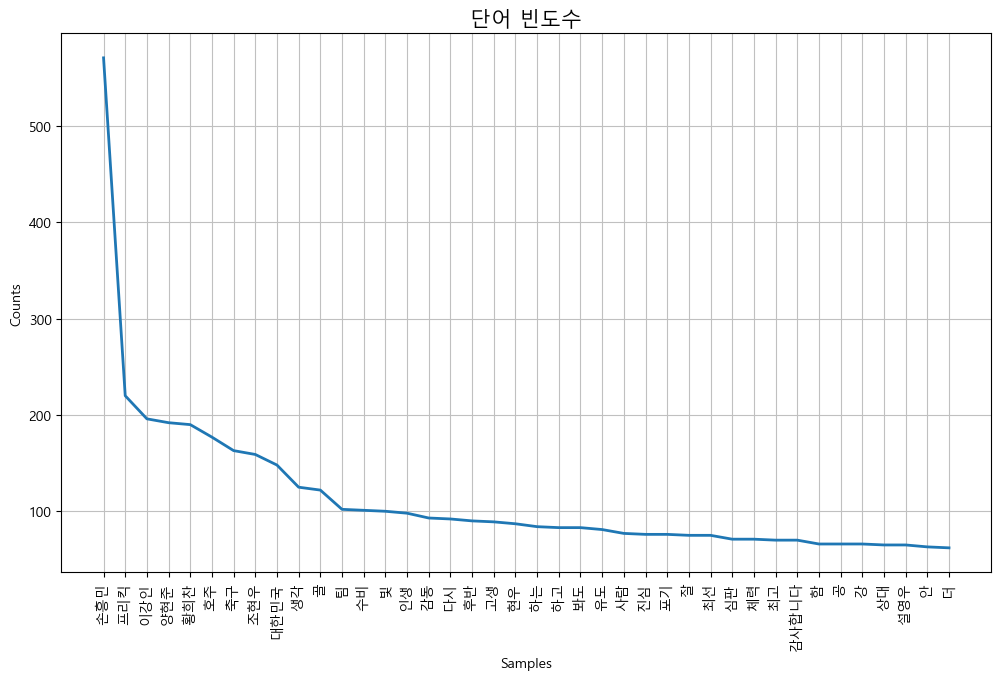

In [11]:
# 빈도수 선그래프
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 7))
plt.title("단어 빈도수", fontsize=15)
txt.plot(40)
plt.show()

In [28]:
with open("comments_processed.txt", 'rt', encoding='utf-8') as fr:
    text_list = fr.read()

# 특수문자, 숫자, 이모티콘 제거
text_list = re.sub(r"[^a-zA-z가-힣 .]", "", text_list)

print(text_list[:100])
text_list = text_list.split(".")
print(text_list[:100])


아시아 역사상 최고의 선수 손흥민 근데 황희찬 진짜 미친 강심장이다. 저기서 본인이 나서서 실패하면 엄청 욕먹을거 알면서도 자신 있다고 하고 저렇게 깔끔하게 성공.. 씨찬이 다시 
['아시아 역사상 최고의 선수 손흥민 근데 황희찬 진짜 미친 강심장이다', ' 저기서 본인이 나서서 실패하면 엄청 욕먹을거 알면서도 자신 있다고 하고 저렇게 깔끔하게 성공', '', ' 씨찬이 다시 봤음 더 크게 되길 조현우 칭찬해줘라 진짜 조현우도 최고다', '', ' 사실 막아주는 것도 매우 중여하다고 생각함', '', '모두 잘해줬다 정말 이번 아시안컵 최대 빌런은 대한민국임', '  상대팀 행복회로 다 돌려놓고 추가시간에 동점만들고 역전해버림  손흥민 선수 역시 월드클라스 황희찬선수가 또한 숨은 MVP 아닌가요  하이라이트다시봐도 떨리네요 정말 대한민국 선수들 자랑스럽습니다  손흥민 이번 프리킥은 그야말로 인간이 발로 만들수 있는 최고의 걸작  진짜 현우형 개잘하네 요즘 조현우 얘기도 없네 자기 몸 사리지도 않고 열심히 막는 거 보고 진심 존경스럽다 손흥민이 얻어낸 페널티를 희찬이 마무리하고희찬이 얻어낸 프리킥을 손흥민이 마무리했다  레드카드 보고 좋아하는 씨찬이형  명이 둘어싸는데도 공을 지켜내는  황희찬 얘기가없네', '', ' 공격할때 누구보다 공격적으로 하고 진짜 공격의 흐름을 바꿔주는 큰 선수임 진짜 개멋있다 우와', '', '몇 번을 봐도 프리킥은 정말 예술이다', '', '', ' 저 궤적이 어케 나오지', '', ' 요르단전 보고 빡쳐서 온 사람이면 개추 축구보면서 인생을 배웠습니다', '', '', '끝까지 집중해줘서 고맙습니다', ' 진짜 양현준이 개인적으로 숨은 조커카드역할 잘했다고 생각함', '후반에 진짜 볼 메이킹 잘하고 잘 이어줬다', '', '', '첫출전이라 들었는데 국내에 저런 선수가 있을 줄이야', '', '', ' 손흥민 정말 대단하다', ' 답답하게 안 풀리는 경기에서 어떻게든 한골이라도 만들려고 패널티킥 유도하려고 온 몸을 던지는 투혼',

In [52]:
with open("comments_processed.txt", 'rt', encoding='utf-8') as fr:
    text_lst = fr.read()

In [53]:
text_lst

'아시아 역사상 최고의 선수 “손흥민“ 근데 황희찬 진짜 미친 강심장이다. 저기서 본인이 나서서 실패하면 엄청 욕먹을거 알면서도 자신 있다고 하고 저렇게 깔끔하게 성공.. 씨찬이 다시 봤음 더 크게 되길 조현우 칭찬해줘라 진짜 조현우도 최고다.. 사실 막아주는 것도 매우 중여하다고 생각함..\n\n모두 잘해줬다 정말 ㄹㅇ이번 아시안컵 최대 빌런은 대한민국임. ㅋㅋㅋㅋ 상대팀 행복회로 다 돌려놓고 추가시간에 동점만들고 역전해버림 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 손흥민 선수 역시 월드클라스 황희찬선수가 또한 숨은 MVP 아닌가요 ? 하이라이트다시봐도 떨리네요 \n정말 대한민국 선수들 자랑스럽습니다  손흥민 이번 프리킥은 그야말로 인간이 발로 만들수 있는 최고의 걸작 5:08 진짜 현우형 개잘하네 요즘 조현우 얘기도 없네… 자기 몸 사리지도 않고 열심히 막는 거 보고 진심 존경스럽다 손흥민이 얻어낸 페널티를 희찬이 마무리하고\n희찬이 얻어낸 프리킥을 손흥민이 마무리했다 11:49 레드카드 보고 좋아하는 씨찬이형ㅋㅋㅋㅋㅋㅋ 4:35 4명이 둘어싸는데도 공을 지켜내는 ㄷㄷ 황희찬 얘기가없네.. 공격할때 누구보다 공격적으로 하고 진짜 공격의 흐름을 바꿔주는 큰 선수임 진짜 개멋있다 우와..몇 번을 봐도 프리킥은 정말 예술이다...ㅎㄷㄷㄷ 저 궤적이 어케 나오지.. 요르단전 보고 빡쳐서 온 사람이면 개추 축구보면서 인생을 배웠습니다...끝까지 집중해줘서 고맙습니다. 진짜 양현준이 개인적으로 숨은 조커카드역할 잘했다고 생각함.\n\n후반에 진짜 볼 메이킹 잘하고 잘 이어줬다...\n\n첫출전이라 들었는데 국내에 저런 선수가 있을 줄이야... 손흥민 정말 대단하다. 답답하게 안 풀리는 경기에서 어떻게든 한골이라도 만들려고 패널티킥 유도하려고 온 몸을 던지는 투혼..정말 대한민국을 정말 사랑하는구나..\n대한민국 축구 역사상 글고 아시아 최고의 선수 맞습니다!! 모든 장면 장면 다 좋았지만...\n진짜 막판에 설영우 터치라인 따라 수비 셋 달고 이악물고 뛰는데...\n등골부터

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(text_list)  # DTM을 어떻게 만들지 train set을 이용해 학습.  ==> vocab 생성
stopwords_cv = cv.transform(text_list) # 변환작업  ==> 문장별 빈도수를 가지고 dtm을 생성.

In [30]:
# 어절단위 토큰화. 모두 소문자로 변환.
cv.vocabulary_  # 어휘 사전 반환.  dict: token-id

{'아시아': 1090,
 '역사상': 1213,
 '최고의': 1710,
 '선수': 906,
 '손흥민': 954,
 '근데': 244,
 '황희찬': 1994,
 '진짜': 1657,
 '미친': 697,
 '강심장이다': 63,
 '저기서': 1515,
 '본인이': 782,
 '나서서': 309,
 '실패하면': 1038,
 '엄청': 1192,
 '욕먹을거': 1282,
 '알면서도': 1131,
 '자신': 1456,
 '있다고': 1426,
 '하고': 1886,
 '저렇게': 1518,
 '깔끔하게': 284,
 '성공': 937,
 '씨찬이': 1066,
 '다시': 393,
 '봤음': 796,
 '크게': 1754,
 '되길': 480,
 '조현우': 1568,
 '칭찬해줘라': 1745,
 '조현우도': 1571,
 '최고다': 1707,
 '사실': 851,
 '막아주는': 577,
 '것도': 108,
 '매우': 618,
 '중여하다고': 1625,
 '생각함': 888,
 '모두': 654,
 '잘해줬다': 1490,
 '정말': 1542,
 '이번': 1372,
 '아시안컵': 1092,
 '최대': 1711,
 '빌런은': 820,
 '대한민국임': 452,
 '상대팀': 869,
 '행복회로': 1955,
 '돌려놓고': 470,
 '추가시간에': 1717,
 '동점만들고': 478,
 '역전해버림': 1216,
 '역시': 1215,
 '월드클라스': 1317,
 '황희찬선수가': 1997,
 '또한': 528,
 '숨은': 988,
 'mvp': 6,
 '아닌가요': 1077,
 '하이라이트다시봐도': 1905,
 '떨리네요': 526,
 '대한민국': 447,
 '선수들': 910,
 '자랑스럽습니다': 1453,
 '프리킥은': 1868,
 '그야말로': 235,
 '인간이': 1395,
 '발로': 730,
 '만들수': 587,
 '있는': 1423,
 '걸작': 106,
 '현우형': 1961,
 '개잘하네': 

In [31]:
stopwords_cv

<2623x2045 sparse matrix of type '<class 'numpy.int64'>'
	with 20171 stored elements in Compressed Sparse Row format>

In [32]:
stopwords_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
cv.get_feature_names_out()

array(['a매치', 'epl', 'epl팀', ..., '힘들었을지', '힘들텐데도', '힘이'], dtype=object)

In [43]:
text_list

['아시아 역사상 최고의 선수 손흥민 근데 황희찬 진짜 미친 강심장이다',
 ' 저기서 본인이 나서서 실패하면 엄청 욕먹을거 알면서도 자신 있다고 하고 저렇게 깔끔하게 성공',
 '',
 ' 씨찬이 다시 봤음 더 크게 되길 조현우 칭찬해줘라 진짜 조현우도 최고다',
 '',
 ' 사실 막아주는 것도 매우 중여하다고 생각함',
 '',
 '모두 잘해줬다 정말 이번 아시안컵 최대 빌런은 대한민국임',
 '  상대팀 행복회로 다 돌려놓고 추가시간에 동점만들고 역전해버림  손흥민 선수 역시 월드클라스 황희찬선수가 또한 숨은 MVP 아닌가요  하이라이트다시봐도 떨리네요 정말 대한민국 선수들 자랑스럽습니다  손흥민 이번 프리킥은 그야말로 인간이 발로 만들수 있는 최고의 걸작  진짜 현우형 개잘하네 요즘 조현우 얘기도 없네 자기 몸 사리지도 않고 열심히 막는 거 보고 진심 존경스럽다 손흥민이 얻어낸 페널티를 희찬이 마무리하고희찬이 얻어낸 프리킥을 손흥민이 마무리했다  레드카드 보고 좋아하는 씨찬이형  명이 둘어싸는데도 공을 지켜내는  황희찬 얘기가없네',
 '',
 ' 공격할때 누구보다 공격적으로 하고 진짜 공격의 흐름을 바꿔주는 큰 선수임 진짜 개멋있다 우와',
 '',
 '몇 번을 봐도 프리킥은 정말 예술이다',
 '',
 '',
 ' 저 궤적이 어케 나오지',
 '',
 ' 요르단전 보고 빡쳐서 온 사람이면 개추 축구보면서 인생을 배웠습니다',
 '',
 '',
 '끝까지 집중해줘서 고맙습니다',
 ' 진짜 양현준이 개인적으로 숨은 조커카드역할 잘했다고 생각함',
 '후반에 진짜 볼 메이킹 잘하고 잘 이어줬다',
 '',
 '',
 '첫출전이라 들었는데 국내에 저런 선수가 있을 줄이야',
 '',
 '',
 ' 손흥민 정말 대단하다',
 ' 답답하게 안 풀리는 경기에서 어떻게든 한골이라도 만들려고 패널티킥 유도하려고 온 몸을 던지는 투혼',
 '',
 '정말 대한민국을 정말 사랑하는구나',
 '',
 '대한민국 축구 역사상 글고 아시아 최고의 선수 맞습니다 모든 장면

In [55]:
print(len(okt_tokens))
okt_tokens

38369


[('아시아', 'Noun'),
 ('역사상', 'Noun'),
 ('최고', 'Noun'),
 ('의', 'Josa'),
 ('선수', 'Noun'),
 ('“', 'Foreign'),
 ('손흥민', 'Noun'),
 ('“', 'Foreign'),
 ('근데', 'Adverb'),
 ('황희찬', 'Noun'),
 ('진짜', 'Noun'),
 ('미치다', 'Adjective'),
 ('강심장', 'Noun'),
 ('이다', 'Josa'),
 ('.', 'Punctuation'),
 ('저기', 'Noun'),
 ('서', 'Josa'),
 ('본인', 'Noun'),
 ('이', 'Josa'),
 ('나서다', 'Verb'),
 ('실패하다', 'Adjective'),
 ('엄청', 'Adverb'),
 ('욕먹다', 'Verb'),
 ('알다', 'Verb'),
 ('자신', 'Noun'),
 ('있다', 'Adjective'),
 ('하다', 'Verb'),
 ('저렇게', 'Adverb'),
 ('깔끔하다', 'Adjective'),
 ('성공', 'Noun'),
 ('..', 'Punctuation'),
 ('씨찬', 'Noun'),
 ('이', 'Josa'),
 ('다시', 'Noun'),
 ('보다', 'Verb'),
 ('더', 'Noun'),
 ('크게', 'Noun'),
 ('되다', 'Verb'),
 ('조현우', 'Noun'),
 ('칭찬', 'Noun'),
 ('해주다', 'Verb'),
 ('진짜', 'Noun'),
 ('조현우', 'Noun'),
 ('도', 'Josa'),
 ('최고다', 'Noun'),
 ('..', 'Punctuation'),
 ('사실', 'Noun'),
 ('막다', 'Verb'),
 ('것', 'Noun'),
 ('도', 'Josa'),
 ('매우', 'Noun'),
 ('중', 'Noun'),
 ('여', 'Josa'),
 ('하다', 'Verb'),
 ('생각', 'Noun'),
 ('함', '

In [44]:
# Okt 토크나이저 함수 정의
okt = Okt()
def okt_tokenizer(text):
    return okt.pos(text, stem=True)

In [45]:
cv2 = CountVectorizer(
    tokenizer=okt_tokenizer, # 토큰화 함수를 제공.
    token_pattern=None  # 토큰기준 regexp 패턴. 토크나이저 함수를 지정하므로 default 패턴을 제거.
)
cv2.fit(text_list)

CountVectorizer(token_pattern=None,
                tokenizer=<function okt_tokenizer at 0x000001D8B26F44A0>)

In [46]:
result = cv2.transform(text_list)
result.shape

(2623, 1354)

In [47]:
result

<2623x1354 sparse matrix of type '<class 'numpy.int64'>'
	with 29775 stored elements in Compressed Sparse Row format>

In [ ]:
cv2.get_feature_names_out()[:20]

array([['\n', 'Foreign'],
       ['""', 'Punctuation'],
       ['.', 'Punctuation'],
       ['..', 'Punctuation'],
       ['...', 'Punctuation'],
       ['11:49', 'Number'],
       ['4', 'Number'],
       ['4:35', 'Number'],
       ['5:08', 'Number'],
       ['?', 'Punctuation'],
       ['mvp', 'Alpha'],
       ['“', 'Foreign'],
       ['…', 'Punctuation'],
       ['……', 'Punctuation'],
       ['……….', 'Punctuation'],
       ['ㄷㄷ', 'KoreanParticle'],
       ['ㄹㅇ', 'KoreanParticle'],
       ['ㄹㅈㄷ', 'KoreanParticle'],
       ['ㅈㄴ', 'KoreanParticle'],
       ['ㅋㅋㅋㅋ', 'KoreanParticle']], dtype=object)

In [29]:
result.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(
    max_features= 10_000, # 총 토큰개수
    min_df= 5, # 빈도수가 5회 미만인 token 제외
    tokenizer= okt_tokenizer, # 토크나이저 설정
    token_pattern= None,
    stop_words = stopwords
)
# 학습-어떻게 바꿀지
tfidf.fit(text_list)
# 변환
result_tfidf = tfidf.transform(text_list)

c:\class1\06_NLP_Preprocessing\env\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [('가', 'Josa'), ('가까스로', 'Noun'), ('가다', 'Verb'), ('가령', 'Noun'), ('각', 'Noun'), ('각각', 'Noun'), ('각자', 'Noun'), ('각종', 'Noun'), ('각하', 'Noun'), ('간', 'Noun'), ('갖다', 'Verb'), ('같다', 'Adjective'), ('같이', 'Adverb'), ('같이', 'Josa'), ('개', 'Noun'), ('거나', 'Noun'), ('거니와', 'Eomi'), ('거리', 'Noun'), ('거바', 'Noun'), ('거의', 'Noun'), ('걸', 'Noun'), ('겁', 'Noun'), ('것', 'Noun'), ('것과', 'Noun'), ('게', 'Noun'), ('게다가', 'Noun'), ('게우다', 'Verb'), ('겨우', 'Noun'), ('견지', 'Noun'), ('결과', 'Noun'), ('결국', 'Adverb'), ('결론', 'Noun'), ('겸사겸사', 'Noun'), ('경기', 'Noun'), ('고려', 'Noun'), ('고로', 'Noun'), ('곤', 'Noun'), ('곧', 'Noun'), ('곳', 'Noun'), ('공동', 'Noun'), ('과', 'Josa'), ('과', 'Noun'), ('과연', 'Noun'), ('관', 'Noun'), ('관계', 'Noun'), ('관계없이', 'Adverb'), ('관련', 'Noun'), ('구', 'Noun'), ('구체', 'Noun'), 

In [49]:
result_tfidf.shape

(2623, 1093)

In [56]:
result_df = pd.DataFrame(result_tfidf.toarray(), columns=tfidf.get_feature_names_out())
result_df.sum().sort_values(ascending=False)

(하다, Verb)      104.201273
(선수, Noun)       71.890374
(이, Josa)        70.960959
(을, Josa)        60.657036
(손흥민, Noun)      57.596225
                   ...    
(공격성, Noun)       0.588952
(대역, Noun)        0.588952
(그만, Adverb)      0.588952
(악플, Noun)        0.588952
(인신, Noun)        0.588952
Length: 1093, dtype: float64

In [59]:
# result_df.to_csv('result')

In [120]:
txt = [text.strip() for text in text_list if len(text)!=0]

In [122]:
# 데이터 두 개로 나누기
from sklearn.model_selection import train_test_split

train, test = train_test_split(txt, test_size=0.2, random_state=42)

data = train + test
test

['드디어 나오나요  너무 훌륭한 경기 였어요',
 '손흥민좀 살려봐라  골 pk유도',
 '상대팀 행복회로 다 돌려놓고 추가시간에 동점만들고 역전해버림  손흥민 선수 역시 월드클라스 황희찬선수가 또한 숨은 MVP 아닌가요  하이라이트다시봐도 떨리네요 정말 대한민국 선수들 자랑스럽습니다  손흥민 이번 프리킥은 그야말로 인간이 발로 만들수 있는 최고의 걸작  진짜 현우형 개잘하네 요즘 조현우 얘기도 없네 자기 몸 사리지도 않고 열심히 막는 거 보고 진심 존경스럽다 손흥민이 얻어낸 페널티를 희찬이 마무리하고희찬이 얻어낸 프리킥을 손흥민이 마무리했다  레드카드 보고 좋아하는 씨찬이형  명이 둘어싸는데도 공을 지켜내는  황희찬 얘기가없네',
 '휘슬 불고 끝나기 분전까지도 모른다',
 '등골부터 소름이 쫙 돋아 올라오드라',
 '이재성 너무 갈린다  후보 시작 이후 교체 출전',
 '공격할때 누구보다 공격적으로 하고 진짜 공격의 흐름을 바꿔주는 큰 선수임 진짜 개멋있다 우와',
 '어제는 태극전사들 덕에 행복했습니다고맙고 사랑스럽고 믿음직스럽고대한민국 국민이라는게 자랑스럽고',
 '대한민국 축구 역사상 글고 아시아 최고의 선수 맞습니다 모든 장면 장면 다 좋았지만',
 '첫출전이라 들었는데 국내에 저런 선수가 있을 줄이야',
 '월클이라 할만하다',
 '우리나라 선수들 화이팅',
 '정말 대단한 퍼포먼스였음왜 빅리거인지 알수 있었던 경기',
 '축구머리가 있는 친구인 것 같다',
 '양현준 드디어 사람들이 알아봐주는 것같아서 내가 다 기쁘네 손흥민은  패널티킥을 황희찬에게 내주고 그상황에서 성공시킨 황희찬도 멋있고  환상적인 프리킥을 성공시킨 손흥민은 더 믿음직스럽고 든든하고 인성도 훌륭한 리더 입니다이렇게 훌륭하게 키워낸 손흥민 부모님도 훌륭하십니다',
 '우리선수들 부담스러워서 잘 못하는 플레이들을 시원시원하게 너무 잘해줌',
 '노력과 최선은  나에게 성취감을 꼭 안겨다 줄거라 믿게 되었고 그걸 꼭 느껴보고 싶어졌습니다',
 '모두 잘해줬다 정말 이번 아시안컵 

In [111]:
f = open(r'C:\class1\06_NLP_Preprocessing\pjt\stopwords.csv',"rt", encoding = "utf-8")
stopwords = f.read().split("\n")
stopwords.extend(['게',"없다", "선수", "들다","아니다","해주다","내다", "스럽다","희다","진짜","끝","보다","보고","정말","경기","뛰다"])

In [129]:
# Okt 토크나이저 함수 정의
okt = Okt()
def okt_tokenizer(text):
    tokens = okt.morphs(text, stem=True)
    return [token for token in tokens if token not in stopwords] 
     

In [130]:
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(
    max_features= 10_000, # 총 토큰개수
    min_df= 5, # 빈도수가 5회 미만인 token 제외
    tokenizer= okt_tokenizer, # 토크나이저 설정
    token_pattern= None
)
# 학습-어떻게 바꿀지
tfidf.fit(train)
# 변환
result1_tfidf = tfidf.transform(train)
result2_tfidf = tfidf.transform(test)

In [131]:
result1_df = pd.DataFrame(result1_tfidf.toarray(), columns=tfidf.get_feature_names_out())
result2_df = pd.DataFrame(result2_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [132]:
result1_df.sum().sort_values(ascending=False)

하다      84.517883
손흥민     49.746282
도       39.063527
잘       34.197427
너무      33.534611
          ...    
중재       0.659678
상당하다     0.659678
누가       0.659678
옵        0.659678
한두       0.659678
Length: 895, dtype: float64

In [133]:
result2_df.sum().sort_values(ascending=False)

하다      23.621541
손흥민     13.024910
도        9.685287
이다       9.137135
너무       8.856841
          ...    
업적       0.000000
엄청나다     0.000000
신입       0.000000
증명       0.000000
캐리       0.000000
Length: 895, dtype: float64

In [ ]:
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################

In [ ]:
from sentencepiece import SentencePieceTrainer    # 어휘사전을 만드는 클래스
from sentencepiece import SentencePieceProcessor

In [ ]:
import time
s = time.time()
SentencePieceTrainer.Train("--input=comments_processed.txt --model_prefix=data/petitions_bpe \
                           --vocab_size=20000 --model_type=bpe --unk_id=0")
e = time.time()
print(f"걸린시간: {e-s}초")

걸린시간: 1.2397935390472412초


In [ ]:
tokenizer = SentencePieceProcessor()
# 저장된 학습 모델 파일 로딩
tokenizer.Load("data/petitions_bpe.model")

True

In [ ]:
txt = open('comments_processed.txt', 'rt',encoding='utf-8')

In [ ]:
########################################################################################################################
#########################################################################################################################
#########################################################################################################################

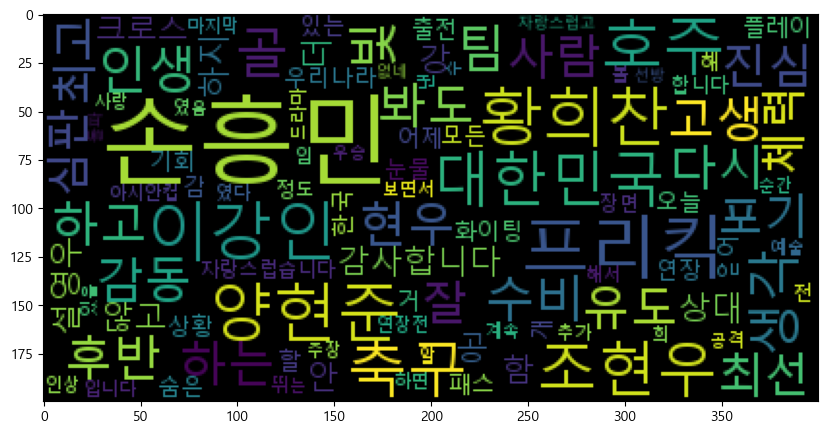

In [51]:

## WordCloud
from wordcloud import WordCloud

wc = WordCloud(
    font_path = r"c:\Winddows\Fonts\malgun.ttf",
    max_words = 100,
    min_font_size = 1,
    max_font_size = 50,
    relative_scaling = 0.5, 
)
# 파일 저장 
# 출력 이미지 
word_cloud_img = wc.generate_from_frequencies(fd)

os.makedirs("project/wordcloud",exist_ok=True)
wc.to_file(f"project/wordcloud/aus_wc_{d}.png")

plt.figure(figsize= (10,10))
plt.imshow(word_cloud_img)